Data Understanding:



1.   Have an understanding of data and business surrounding the data
2.   Know how the data is being collected
    i.e. business, system,survey etc
3.  Is it raw or summarized data. Generally data from warehouse is summarized.
4.   If summarized what is the lineage of data. Process of summarization
5. Understanding the distribution and nature of your data. Descriptive stats.
6. Analyze the data, draw and assess conclusion from it. Inferential Stats
![alt text](https://miro.medium.com/max/1164/1*WD8uN3s7_eo1peVehPZAVA.jpeg)

In [0]:
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devpratap1124","key":"ffe59199092d3f05de0e595597b35842"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d wordsforthewise/lending-club
!ls

lending-club.zip: Skipping, found more recently modified local copy (use --force to force download)
kaggle.json  lending-club.zip  sample_data


In [4]:
from zipfile import ZipFile
zip_file = ZipFile('/content/lending-club.zip')

data=pd.read_csv(zip_file.open('accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'))
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df =data.sample(frac=.16)

In [40]:
df.shape

(361712, 151)

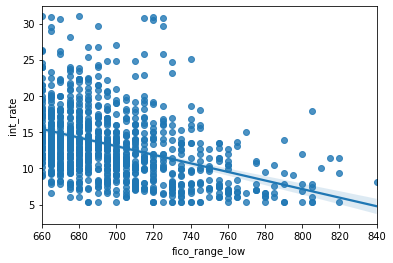

In [11]:
sns.regplot(x="fico_range_low",y='int_rate',data=df[:1000])

In [12]:
df['loan_status'].value_counts()

Fully Paid                                             172131
Current                                                140766
Charged Off                                             42881
Late (31-120 days)                                       3460
In Grace Period                                          1356
Late (16-30 days)                                         660
Does not meet the credit policy. Status:Fully Paid        310
Does not meet the credit policy. Status:Charged Off       132
Default                                                     9
Name: loan_status, dtype: int64

In [0]:
loan_int_df = df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off') | (df['loan_status']=='Default')]

In [42]:
loan_int_df['loan_status'].value_counts()

Fully Paid     172284
Charged Off     42729
Default            11
Name: loan_status, dtype: int64

In [43]:
loan_int_df.groupby('loan_status').agg({'last_fico_range_high':'mean'})

,last_fico_range_high
loan_status,
Charged Off,568.387418
Default,599.454545
Fully Paid,704.640715


In [44]:
loan_int_df['loan_status'] = loan_int_df['loan_status'].replace('Charged Off','Default')
loan_int_df['loan_status'] = loan_int_df['loan_status'].replace('Fully Paid','Good')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
loan_int_df['loan_status'].value_counts()

Good       172284
Default     42740
Name: loan_status, dtype: int64

In [46]:
loan_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215024 entries, 1900209 to 27256
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 249.4+ MB


In [47]:
loan_int_df['fico_range_low'].min()

630.0

In [48]:
loan_int_df['fico_range_low'].max()

845.0

In [49]:
loan_int_df['last_fico_range_low'].min()

0.0

In [50]:
loan_int_df.loc[df.last_fico_range_low == 0.0, 'last_fico_range_low'] = df.fico_range_low

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [51]:

loan_int_df['last_fico_range_low'].min()

500.0

In [52]:
loan_int_df['last_fico_range_low'].max()

845.0

In [53]:
import math
loan_int_df['fico_score']= loan_int_df['last_fico_range_low'].apply(lambda x:int(math.ceil(x/10))*10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
loan_int_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_score
1135250,33351862,NaN,13700.0,13700.0,13700.0,36 months,16.49,484.98,D,D3,nutrition,5 years,RENT,52000.0,Source Verified,Nov-2014,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,105xx,NY,21.50,0.0,Jul-2006,680.0,684.0,0.0,NaN,NaN,11.0,0.0,12941.0,39.5,17.0,f,0.0,0.0,...,25574.0,16500.0,15050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,760
1234275,21139579,NaN,12000.0,12000.0,12000.0,36 months,12.49,401.39,B,B5,courier,10+ years,RENT,45000.0,Not Verified,Jul-2014,Default,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,453xx,OH,28.29,0.0,Apr-2002,700.0,704.0,1.0,27.0,NaN,13.0,0.0,7220.0,37.2,33.0,w,0.0,0.0,...,50084.0,7300.0,49066.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,580
1163565,31397610,NaN,11800.0,11800.0,11800.0,60 months,12.99,268.43,C,C1,Patient Coordinator,7 years,RENT,27000.0,Source Verified,Oct-2014,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,286xx,NC,36.36,1.0,Feb-1995,680.0,684.0,0.0,23.0,NaN,9.0,0.0,13947.0,80.2,26.0,w,0.0,0.0,...,17424.0,13700.0,19184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,600
219036,55120117,NaN,18000.0,18000.0,18000.0,36 months,11.53,593.83,B,B5,Registered Nurse,10+ years,MORTGAGE,80000.0,Not Verified,Jul-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,326xx,FL,15.61,0.0,Nov-1999,715.0,719.0,0.0,NaN,NaN,6.0,0.0,16967.0,82.8,23.0,w,0.0,0.0,...,45404.0,10500.0,46918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,730
383484,40391269,NaN,15825.0,15825.0,15825.0,36 months,14.99,548.51,C,C5,Registered Nurse,6 years,MORTGAGE,60000.0,Not Verified,Feb-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,925xx,CA,23.00,1.0,Jun-2006,690.0,694.0,0.0,20.0,NaN,8.0,0.0,14521.0,58.1,12.0,f,0.0,0.0,...,24871.0,24000.0,50757.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [31]:
loan_int_df.isna().sum()

id                            0
member_id                215021
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_date          209679
settlement_amount        209679
settlement_percentage    209679
settlement_term          209679
fico_score                    0
Length: 152, dtype: int64

In [54]:
loan_int_df['dti_final']= loan_int_df.apply(lambda x:x['dti_joint'] if pd.isnull(x['dti']) else x['dti'],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
loan_int_df['Annual_final_inc']= loan_int_df.apply(lambda x:x['annual_inc_joint'] if pd.isnull(x['annual_inc']) else x['annual_inc'],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
fico_df=loan_int_df['fico_score'].value_counts().sort_index()

In [0]:
fico_df= pd.concat([fico_df,pd.DataFrame(loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()),pd.DataFrame(loan_int_df[['fico_score','dti_final','loan_amnt','Annual_final_inc']].groupby('fico_score').agg({'dti_final':'mean','loan_amnt':'mean','Annual_final_inc':'median'})),pd.DataFrame(loan_int_df[['fico_score','annual_inc','int_rate']].groupby('fico_score').mean())],ignore_index=True,axis=1)

In [61]:
fico_df.head()

,0,1,2,3,4,5,6
500,1188,993,18.608056,13504.608586,56000.0,64346.944310,15.805118
510,2825,2365,18.930899,13796.752212,57324.0,65564.045508,15.730166
520,3291,2660,19.560635,13842.403525,58500.0,69331.418763,15.401911
530,3621,2907,19.458520,14344.649268,60000.0,68281.805385,15.750889
540,4029,3096,20.092425,14627.835691,60000.0,71554.043599,15.602137


In [0]:
fico_df = fico_df.reset_index()

In [0]:
fico_df.columns = ['fico_score','loan_total','default_total','dti','avg_loan_amnt','median_annual_inc','avg_annual_inc','int_rate']

In [0]:
fico_df['default_rate']=(fico_df.default_total/fico_df.default_total.sum())*100
fico_df['actual_default_rate']=(fico_df.default_total/fico_df.loan_total.sum())*100

In [65]:
fico_df

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,1188,993,18.608056,13504.608586,56000.00,64346.944310,15.805118,2.323350,0.461809
1,510,2825,2365,18.930899,13796.752212,57324.00,65564.045508,15.730166,5.533458,1.099877
2,520,3291,2660,19.560635,13842.403525,58500.00,69331.418763,15.401911,6.223678,1.237071
3,530,3621,2907,19.458520,14344.649268,60000.00,68281.805385,15.750889,6.801591,1.351942
4,540,4029,3096,20.092425,14627.835691,60000.00,71554.043599,15.602137,7.243800,1.439839
5,550,4191,3130,19.876302,14774.737533,60000.00,70110.812804,15.448974,7.323350,1.455651
6,560,4256,3017,20.262495,14775.011748,60902.00,71597.648769,15.314450,7.058961,1.403099
7,570,4168,2848,20.357615,14803.940739,60196.00,72035.610367,15.140643,6.663547,1.324503
8,580,4066,2563,20.112484,14523.149287,60000.00,70848.886151,15.182941,5.996724,1.191960
9,590,3922,2319,19.357473,14318.982662,60000.00,70579.728447,15.115326,5.425831,1.078484


In [0]:
fico_df.to_csv("Loan_analysis.csv",index=False)